In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Linear Regression
# steps to be followed 

#data import 
#data cleaning-->null,replace
#Sampling-->train_test_splite
#Linreg
#Build Model-->fit
#linreg.score-->Rsquare
#AdjRsquare
#linreg.intercept_
#linreg.coef_
#pred-->train_x,test_x
#err_train
#err_mean()
#hist plot
#skew()
#kurt+3
#scatter plot
#data fram-->x=Actual y=pred
#regplot
#err_test
#mse
#rmse
#mape
#acc
# To be taken as note
# 1) data should be numeric and continuous only
# 2) hist should be normaly distributed
# 3) Data should be equaly scattered
# 4) in regplot all data should be linear pred line


In [4]:
import pandas as pd

# LungCapData

In [6]:
pd.read_csv(r'C:\Users\ANKIT PUROHIT\Downloads\archive\lungcapacity.csv')

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean,No of children,Weight (kg)
0,6.475,6.0,62.1,NaN,male,no,3,85.70
1,10.125,18.0,74.7,yes,female,no,0,98.75
2,9.550,16.0,69.7,no,female,yes,0,11.01
3,11.125,14.0,71.0,no,male,no,1,29.78
4,4.800,5.0,56.9,no,male,no,4,72.84
...,...,...,...,...,...,...,...,...
741,9.925,16.0,68.3,no,female,no,3,68.30
742,8.725,19.0,68.4,no,female,no,3,68.40
743,7.075,11.0,66.7,no,male,yes,4,66.70
744,8.825,16.0,71.3,yes,female,no,0,71.30


In [7]:
lung=pd.read_csv(r'C:\Users\ANKIT PUROHIT\Downloads\archive\lungcapacity.csv')

In [8]:
lung.isnull().sum()[lung.isnull().sum()>0]

LungCap(cc)       10
Age( years)       10
Height(inches)     7
Smoke              6
Gender             2
Caesarean          4
Weight (kg)        7
dtype: int64

In [9]:
lung.Smoke.replace({'no':0,'yes':1},inplace=True)
lung.Gender.replace({'male':1,'female':0},inplace=True)
lung.Caesarean.replace({'no':0,'yes':1},inplace=True)

In [21]:
lung = lung.dropna()


In [22]:
lung.head()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean,No of children,Weight (kg)
1,10.125,18.0,74.7,1,0.0,0,0,98.75
2,9.550,16.0,69.7,0,0.0,1,0,11.01
3,11.125,14.0,71.0,0,1.0,0,1,29.78
4,4.800,5.0,56.9,0,1.0,0,4,72.84
5,6.225,11.0,58.7,0,0.0,0,1,24.76


In [23]:
from sklearn.model_selection import train_test_split
lung_train,lung_test=train_test_split(lung,test_size=.2)

In [24]:
lung_train_x=lung_train.iloc[::,1:]
lung_train_y=lung_train.iloc[::,0]

In [25]:
lung_test_x=lung_test.iloc[::,1:]
lung_test_y=lung_test.iloc[::,0]

In [26]:

lung_test_x

,Age( years),Height(inches),Smoke,Gender,Caesarean,No of children,Weight (kg)
173,10.0,66.5,1,0.0,0,3,66.50
611,15.0,63.2,0,0.0,0,4,63.20
111,18.0,76.3,0,0.0,0,1,20.69
175,15.0,65.1,1,1.0,0,1,65.10
739,3.0,51.0,0,1.0,1,3,51.00
...,...,...,...,...,...,...,...
319,16.0,79.3,0,1.0,1,0,79.30
723,15.0,64.9,0,0.0,0,4,64.90
99,10.0,57.0,0,1.0,0,1,54.34
582,12.0,60.3,0,0.0,0,1,60.30


In [27]:
lung_train_x = lung_train_x.dropna()
lung_train_y = lung_train_y.loc[lung_train_x.index]


In [28]:
lung_train_x = lung_train_x.dropna()
lung_train_y = lung_train_y.loc[lung_train_x.index]


In [29]:
linreg.fit(lung_train_x,lung_train_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
linreg.score(lung_train_x,lung_train_y)


0.8409208745384517

In [31]:
lung_train_x.shape[0]

565

In [32]:
lung_train_x.shape[1]

7

In [33]:
Rsquare=linreg.score(lung_train_x,lung_train_y)
n=lung_train_x.shape[0]
k=lung_train_x.shape[1]

adjrsquare=1-(1-Rsquare)*(n-1)/(n-k-1)
adjrsquare

0.8389216754752006

In [34]:
linreg.intercept_

np.float64(-11.019247508701373)

In [35]:
linreg.coef_

array([ 1.56226811e-01,  2.59439925e-01, -3.24152208e-01,  4.09575508e-01,
        2.58102476e-04, -6.11323293e-04, -4.42040296e-04])

In [36]:
pred_train=linreg.predict(lung_train_x)
pred_test=linreg.predict(lung_test_x)

In [37]:
err_train=lung_train_y-pred_train


In [38]:
err_train


495    0.583424
256    0.778682
203   -0.827957
199   -0.475488
108   -0.428424
         ...   
15     1.659146
62     0.652007
341   -0.285133
473    0.581265
720    0.836159
Name: LungCap(cc), Length: 565, dtype: float64

In [39]:
err_train.mean()

np.float64(-1.1318379861665313e-16)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


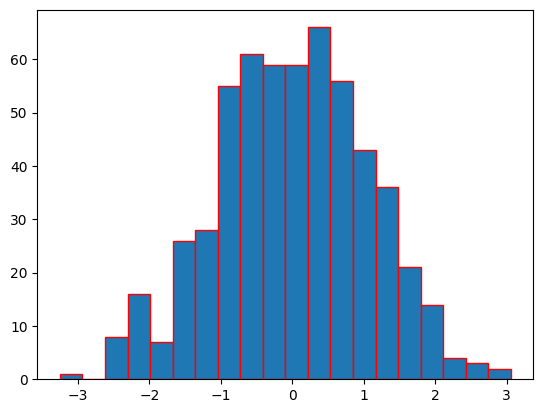

In [41]:
plt.hist(err_train,edgecolor='red',bins=20);

In [42]:
err_train.skew()



np.float64(-0.057528994182891355)

In [43]:
err_train.kurtosis()+3

np.float64(2.7785677298806264)

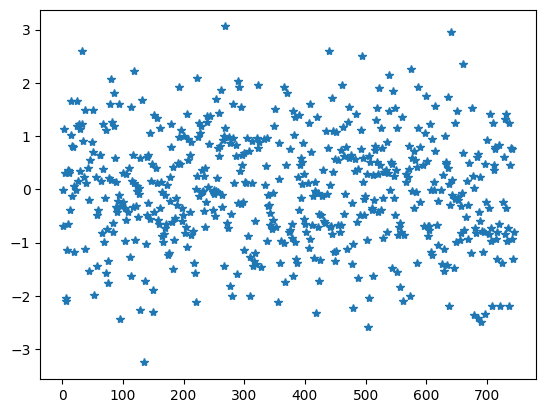

In [44]:
plt.plot(err_train,'*')

In [45]:
pred_act=pd.DataFrame()
pred_act['Actual']=lung_train_y
pred_act['Pred']=pred_train

<Axes: xlabel='Actual', ylabel='Pred'>

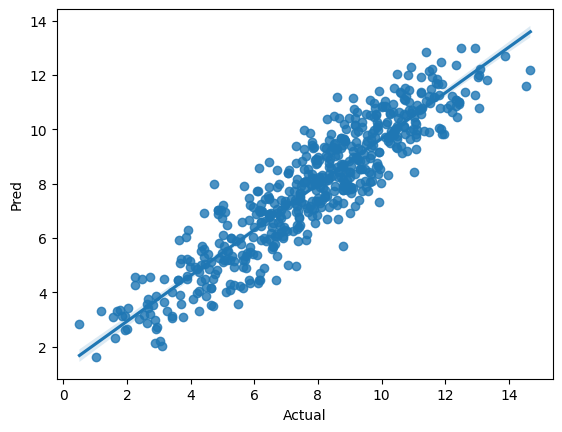

In [46]:
sns.regplot(x='Actual',y='Pred',data=pred_act)

In [47]:
err_test=lung_test_y-pred_test
err_test

173   -0.990394
611    0.859624
111    0.571656
175    1.180271
739    0.358675
         ...   
319   -1.453747
723    1.694328
99     0.383960
582   -0.422435
491    1.689629
Name: LungCap(cc), Length: 142, dtype: float64

In [48]:
import numpy as np

In [50]:
mse=np.mean(np.square(err_test))
mse

np.float64(165.7303078368429)

In [51]:
np.sqrt(mse)

np.float64(12.873628386622123)

In [52]:
mape=np.mean(np.abs(err_test*100/lung_test_y))

In [53]:
mape

np.float64(21.14322168299072)

In [54]:
acc=100-mape

In [55]:
acc

np.float64(78.85677831700929)